In [1]:
from matplotlib import pyplot as plt
from scipy.io import wavfile as wf
import math
import scipy as sp
import numpy as np
import IPython
%matplotlib inline

class Signal(object) :
    def __init__(self,rate,samples) :
        """
        Input : rate (int) for how often we sampled
                samples (numpy array) samples
        """
        self.rate = int(rate)
        self.samples = samples


    def plot(self,sound_name='Your Sound') :
        """
        Plots the sound wave described by the samples
        """
        n = self.samples.shape[0]
        x = np.linspace(0,float(n)/self.rate,n)
        plt.subplot(1,2,1)
        plt.plot(x,self.samples,'b')
        plt.xlabel('Seconds')
        plt.ylabel('Frequency')
        plt.title('Sound Wave')
        
        dft = abs(sp.fft(self.samples))
        x_vals = np.arange(1,len(dft)+1,1)*1.
        x_vals /= len(self.samples)
        x_vals *= self.rate

        plt.subplot(1,2,2)
        plt.plot(x_vals,dft,'b')
        plt.xlabel('Hz')
        plt.title('DFT')
        plt.axis([0,self.rate,0,max(dft)])
        plt.suptitle(sound_name)
        plt.show()

    def export(self,filename) :
        """
        b = max(self.samples)
        a = min(self.samples)

        new_samples = self.samples*32767*2/(b-a)
        new_samples -= (b+a)/2
        new_samples = np.int16(new_samples)
        """

        wf.write(filename,self.rate,self.samples)

    def __add__(self,other) :
        if self.rate != other.rate:
            raise ValueError("Sounds incompatible.")
        else :
            if self.samples.shape[0] > other.samples.shape[0] :
                needed = self.samples.shape[0]-other.samples.shape[0]
                zeros = np.zeros(shape=(1,needed))[0]
                padded_other = np.hstack((other.samples,zeros))
                new_signal = self.samples + padded_other
            elif self.samples.shape[0] < other.samples.shape[0] :
                needed = other.samples.shape[0]-self.samples.shape[0]
                zeros = np.zeros(shape=(1,needed))[0]
                padded_self = np.hstack((self.samples,zeros))
                new_signal = padded_self + other.samples
            else :
                new_signal = self.samples + other.samples
            return Signal(self.rate,new_signal)

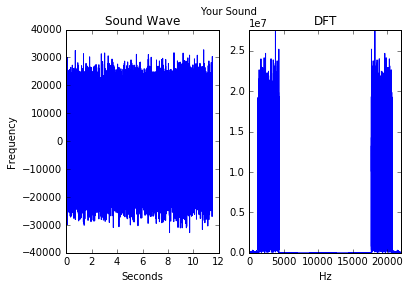

In [2]:
rate,wave = wf.read('Noisysignal2.wav')
fsig = sp.fft(wave,axis=0)
sig = Signal(rate,wave)
sig.plot()

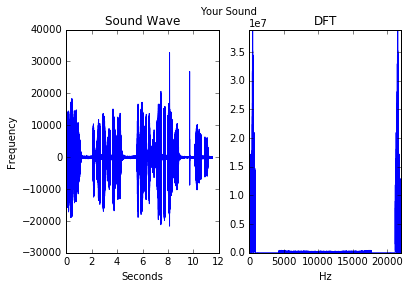

In [3]:
for j in xrange(10000,50000) :
    fsig[j] = 0
    fsig[-j] = 0
new_sig = sp.real(sp.ifft(fsig))
new_sig = sp.int16(new_sig / sp.absolute(new_sig).max() * 32767)
nsig = Signal(rate,new_sig)
nsig.plot()
nsig.export('cleansignal.wav')
IPython.display.Audio('cleansignal.wav')

Theodore Roosevelt says that the only thing we have to fear is fear itself.

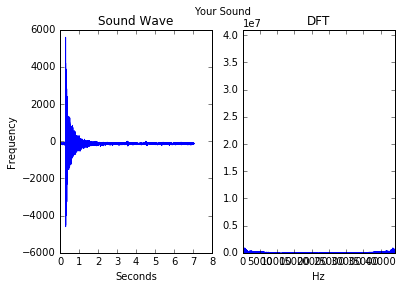

In [4]:
arate,asig = wf.read('balloon.wav')
bsig = Signal(arate,asig)
bsig.plot()

In [6]:
crate,csig = wf.read('chopin.wav')
new_asig = np.zeros(len(asig))
new_asig = np.concatenate((csig,new_asig))
final = np.concatenate((asig[:len(asig)/2],np.zeros(len(csig)),asig[len(asig)/2:]))
final = sp.real(sp.ifft(sp.fft(new_asig)*sp.fft(final)))
final = sp.int16(final / sp.absolute(final).max()*32767)
remastered = Signal(crate,final)
remastered.export('Remastered.wav')
IPython.display.Audio('Remastered.wav')

In [5]:
samplerate = 22050
noise = sp.int16(sp.random.randint(-32767, 32767, samplerate * 10))
white = Signal(samplerate,noise)
white.export('white_noise.wav')
IPython.display.Audio('white_noise.wav')

In [6]:
new_rate, sig1 = wf.read('tada-conv.wav')
sig1 = sp.append(sig1, sig1)
sig1 = sp.append(sig1, sig1)
tdcv = Signal(new_rate,sig1)
tdcv.export('looped-tada-conv.wav')
IPython.display.Audio('looped-tada-conv.wav')